In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix

In [2]:
file_path_all = "/Users/larsfinlaysonmac/Downloads/SeriesReport-20241023161356_b02d92.csv"
with open(file_path_all, 'r') as file:
    for i in range(10):
        line = file.readline()
        print(line.strip())

Consumer Price Index for All Urban Consumers (CPI-U),,,,,,,,,,,,,,
Original Data Value,,,,,,,,,,,,,,
,,,,,,,,,,,,,,
Series Id:,CUUR0000SA0,,,,,,,,,,,,,
Not Seasonally Adjusted,,,,,,,,,,,,,,
Series Title:,"All items in U.S. city average, all urban consumers, not seasonally adjusted",,,,,,,,,,,,,
Area:,U.S. city average,,,,,,,,,,,,,
Item:,All items,,,,,,,,,,,,,
Base Period:,1982-84=100,,,,,,,,,,,,,
Years:,1913 to 2024,,,,,,,,,,,,,


In [3]:
df = pd.read_csv(file_path_all, header=11)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN


In [4]:
df = df.dropna().apply(pd.to_numeric, errors='coerce')

df['CPI'] = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
X = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
y = df['CPI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [5]:
cpi_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
summary_stats = df[cpi_columns].describe()
print(summary_stats)

              Jan         Feb         Mar         Apr         May         Jun  \
count   40.000000   40.000000   40.000000   40.000000   40.000000   40.000000   
mean   187.145550  187.914900  188.824625  189.481125  190.057450  190.655700   
std     52.921196   53.270775   53.665356   53.898105   54.223108   54.563113   
min    101.900000  102.400000  102.600000  103.100000  103.400000  103.700000   
25%    145.300000  145.800000  146.300000  146.550000  146.675000  147.100000   
50%    183.450000  184.650000  185.800000  185.900000  186.300000  186.700000   
75%    231.136750  232.805000  233.609500  233.548000  234.160000  234.713750   
max    299.170000  300.840000  301.836000  303.363000  304.127000  305.109000   

              Jul         Aug         Sep         Oct         Nov         Dec  
count   40.000000   40.000000   40.000000   40.000000   40.000000   40.000000  
mean   190.892825  191.246800  191.730850  191.930875  191.743725  191.515825  
std     54.584329   54.569163 

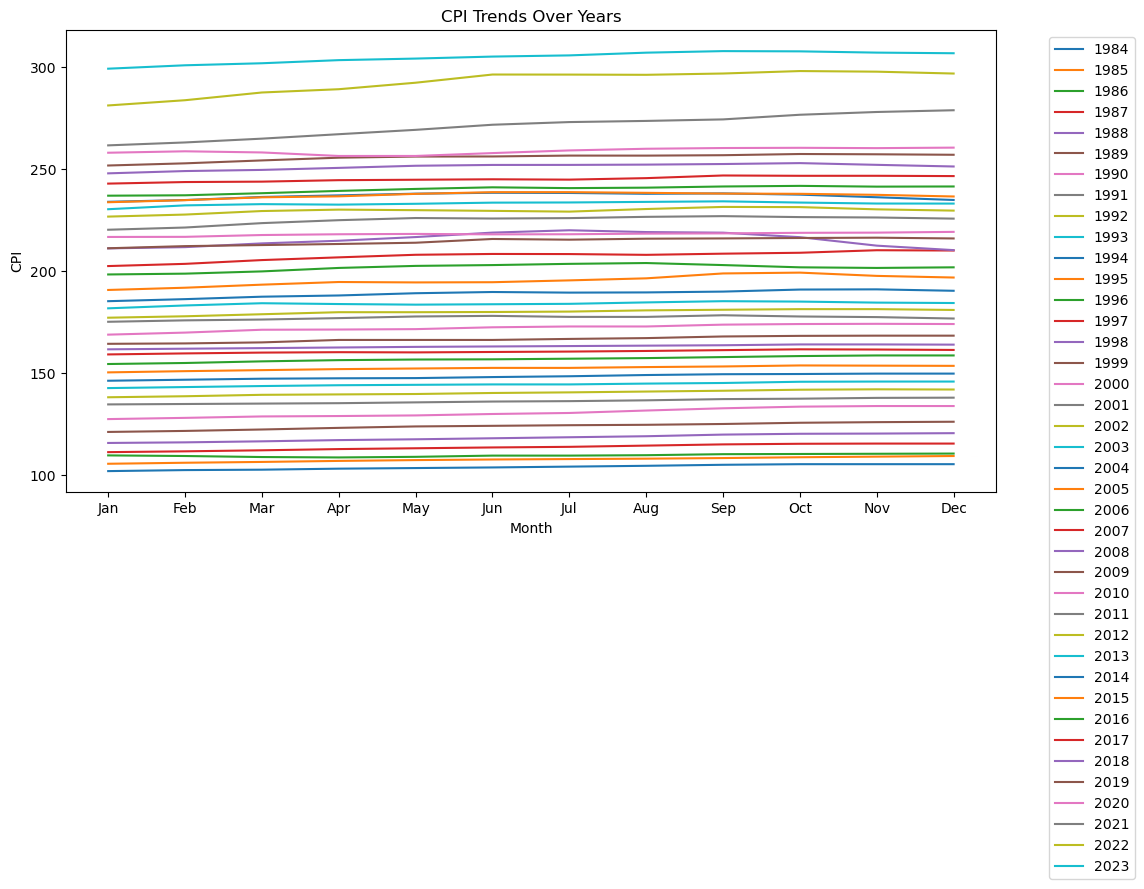

In [6]:
plt.figure(figsize=(12, 6))
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    plt.plot(cpi_columns, year_data.iloc[0, 1:13], label=str(year))
plt.xlabel('Month')
plt.ylabel('CPI')
plt.title('CPI Trends Over Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

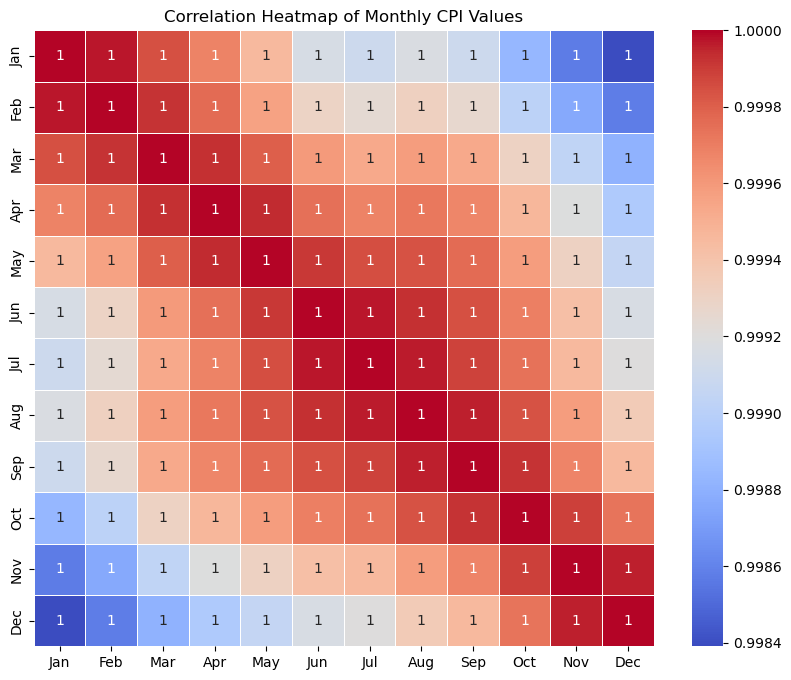

In [7]:
correlation_matrix = df[cpi_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Monthly CPI Values')
plt.show()

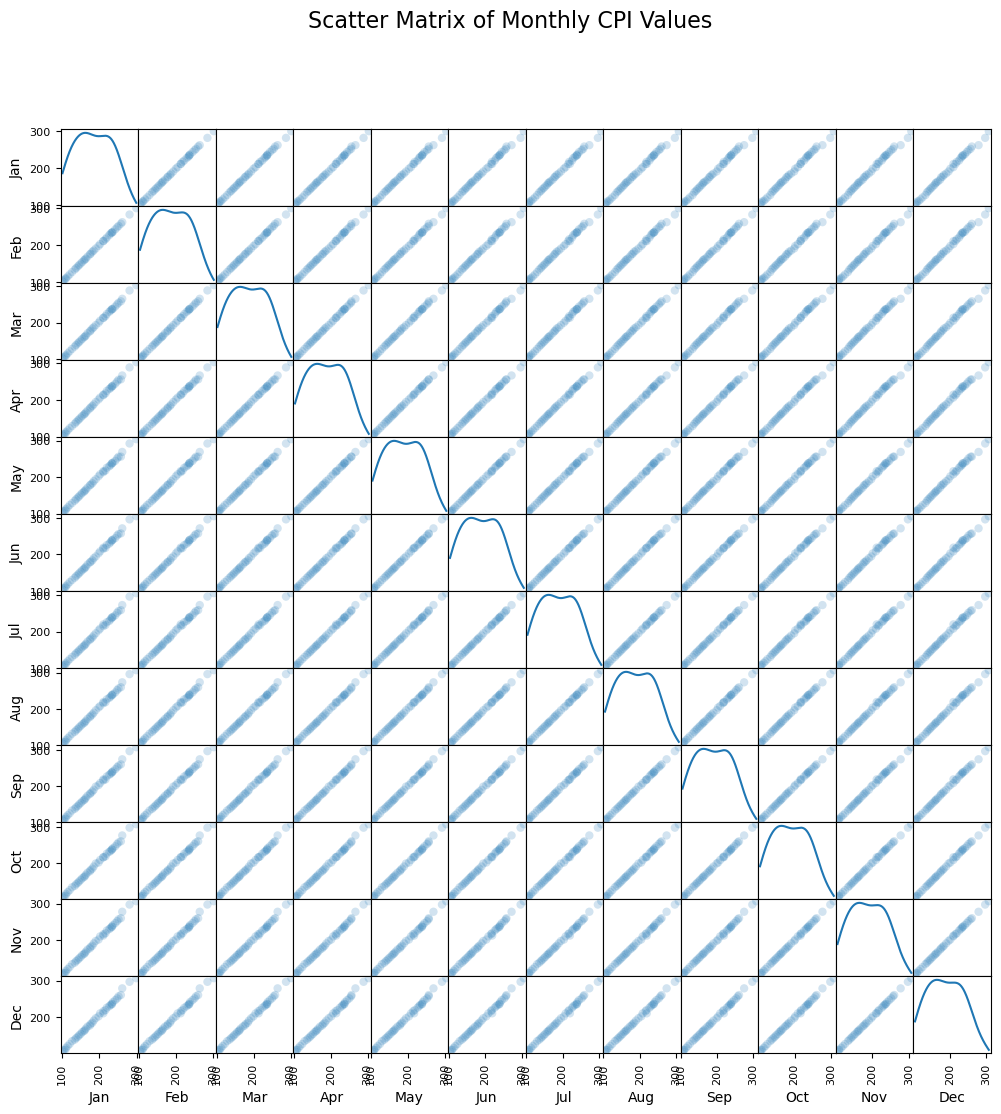

In [8]:
scatter_matrix(df[cpi_columns], alpha=0.2, figsize=(12, 12), diagonal='kde', marker='o')
plt.suptitle('Scatter Matrix of Monthly CPI Values', fontsize=16)
plt.show()

In [9]:
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression().fit(X_poly_train, y_train)
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

models = {
    'Linear Regression': linear_reg,    
    'Ridge Regression': ridge_reg,      
    'Lasso Regression': lasso_reg,      
    'Random Forest': rf_reg,
    'Polynomial Regression': poly_model,  
    'KNN Regression': knn_model         
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [10]:
model_performance = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = {
        'Cross-Validation R²': cv_scores.mean(),
        'Test MSE': mse,
        'Test R²': r2
    }
    
performance_df = pd.DataFrame(model_performance)
print(performance_df)

                     Linear Regression  Ridge Regression  Lasso Regression  \
Cross-Validation R²       1.000000e+00          0.999989          1.000000   
Test MSE                  1.966057e-08          0.012621          0.000776   
Test R²                   1.000000e+00          0.999994          1.000000   

                     Random Forest  Polynomial Regression  KNN Regression  
Cross-Validation R²       0.952250           1.000000e+00        0.955653  
Test MSE                 44.692158           1.966057e-08       18.178325  
Test R²                   0.977232           1.000000e+00        0.990739  


In [11]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression().fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')

Polynomial Regression MSE: 1.9380150336078795e-08


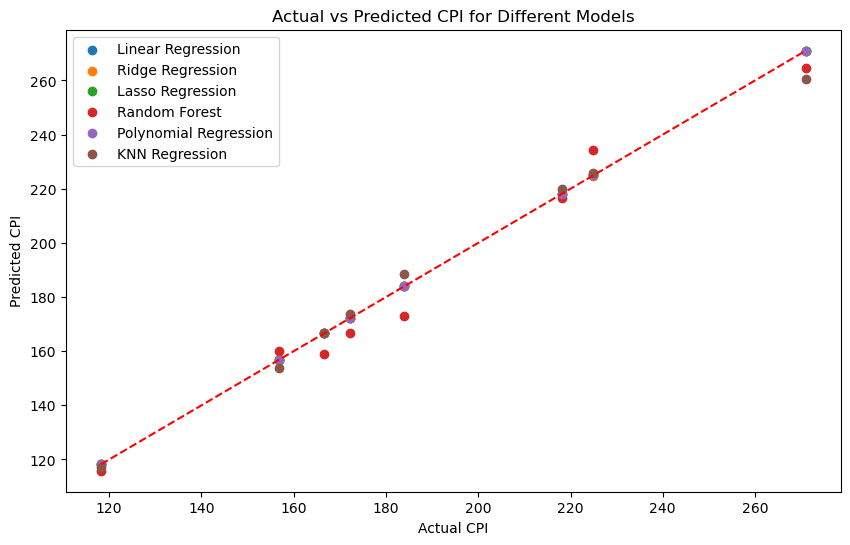

In [12]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual CPI')
plt.ylabel('Predicted CPI')
plt.title('Actual vs Predicted CPI for Different Models')
plt.legend()
plt.show()

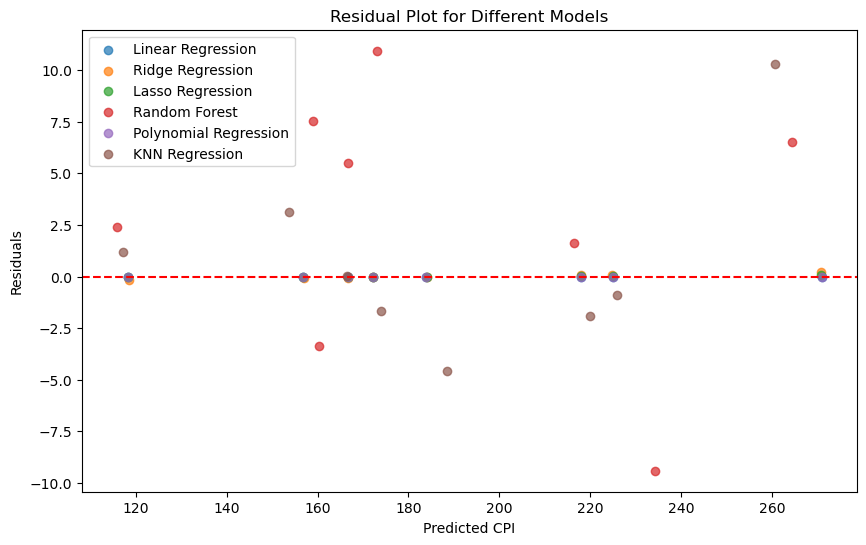

In [13]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=name, alpha=0.7)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted CPI')
plt.ylabel('Residuals')
plt.title('Residual Plot for Different Models')
plt.legend()
plt.show()
